In [1]:
import numpy as np
import scipy as sp
from sklearn.utils import extmath as extm
from matplotlib import pyplot as plt
import time

## Task 1

In [36]:
n = 2000
A = np.random.normal(size=[n,n])

In [3]:
%timeit np.linalg.svd(A)

3.09 s ± 78.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit sp.sparse.linalg.svds(A, k=2)

635 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit extm.randomized_svd(A, n)

6.26 s ± 565 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


d:\code\python\nummethods\venv\lib\site-packages\sklearn\utils\extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


124 ms ± 3.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
def mul(svd_res, k):
    return svd_res[0][:,:k] @ np.diag(svd_res[1][:k]) @ svd_res[2][:k,:]

k=2
A_svd = mul(np.linalg.svd(A), k)
A_svds = mul(sp.sparse.linalg.svds(A, k=k), k)
A_rsvd = mul(extm.randomized_svd(A, n), k)
for matrix in (A_svd, A_svds, A_rsvd):
    diff = A - matrix
    print(np.linalg.norm(diff) / np.linalg.norm(A))

0.9980192793596655
0.9980192793596656
0.9980192793596655


## Task 3

In [7]:
A = np.matrix([[-2,11],[-10,5]])
SVD = np.linalg.svd(A)
def show(svd_res):
    for m in svd_res:
        print(m)
        print('='*20)
show(SVD)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[14.14213562  7.07106781]
[[ 0.6 -0.8]
 [-0.8 -0.6]]


In [17]:
# svd with minimum minus signs
U = -SVD[0] # 1 minus
V = -SVD[2] # 1 minus
# printing the result that is equal to A
print((U @ np.diag(SVD[1]) @ V))

[[ -2.  11.]
 [-10.   5.]]
[[ -2.  11.]
 [-10.   5.]]


Действие матрицы A на векторное пространство назовем преобразованием $A$. Угол между двумя векторами под действием $A$ изменяется, поэтому нужно не менее двух ортогональных преобразований, чтобы разложить преобразование $A$.
У матрицы ортогонального преобразования есть хотя бы один отрицательный элемент, поэтому минимальное количество знаков минус в матрицах U и V - два.

C:\Users\novik\AppData\Local\Temp\ipykernel_18124\3332074060.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  image[:,i] = list(A @ space[:,i])


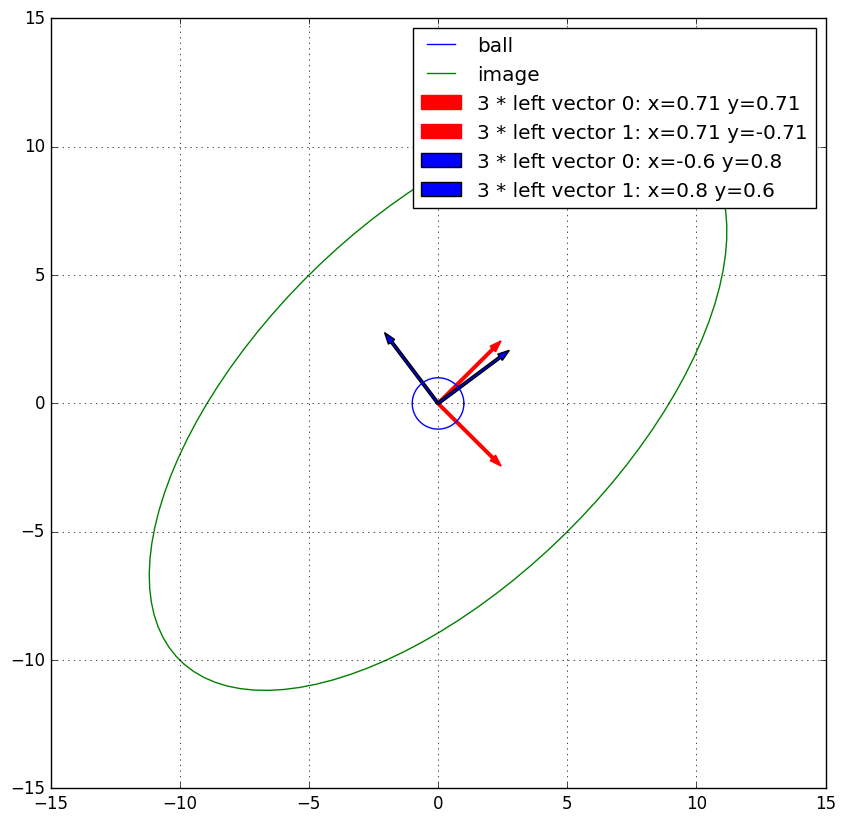

In [9]:
N = 100
phi = np.linspace(0, 6.28, N)
x = np.cos(phi)
y = np.sin(phi)
space = np.matrix((x,y))
image = np.empty((2,N))
for i in range(N):
    image[:,i] = list(A @ space[:,i])

plt.figure(figsize=(10,10))
plt.style.use('classic')
plt.grid()
plt.plot(x, y, label = 'ball')
plt.plot(image[0,:], image[1,:], label = 'image')
for i in (0,1):
    plt.arrow(0, 0, 3*U[0,i], 3*U[i,1], label = f'3 * left vector {i}: x={round(U[i,0],2)} y={round(U[i,1],2)}', width = 0.1, color = 'red')
for i in (0,1):
    plt.arrow(0, 0, 3*V[0,i], 3*V[i,1], label = f'3 * left vector {i}: x={round(V[i,0],2)} y={round(V[i,1],2)}', width = 0.1)
plt.legend()
plt.show()

In [10]:
print(f'Frobenius norm of A = {np.sqrt(np.sum(np.square(SVD[1])))}')
print(f'2-norm of A = {np.max(SVD[1])}')

Frobenius norm of A = 15.811388300841895
2-norm of A = 14.142135623730947


In [11]:
print('Inverse Matrix of A')
V @ np.diag(np.float_power(SVD[1], -1)) @ U

Inverse Matrix of A


matrix([[ 0.05, -0.11],
        [ 0.1 , -0.02]])

In [12]:
values = np.linalg.eig(A)[0]
values

array([1.5+9.88685997j, 1.5-9.88685997j])

In [13]:
print(f'abs of eigenvectors {abs(values[0] * values[1])}')
print(f'product of singular numbers {np.product(SVD[1])}')

abs of eigenvectors 100.00000000000001
product of singular numbers 99.99999999999997


## Task 5

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()
A = digits.data
y = digits.target

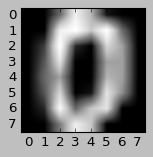

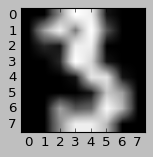

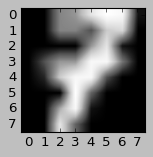

In [43]:
for i in (0, 3, 7):
    plt.figure(figsize=(2,2))
    plt.imshow(A[i].reshape(8, 8), cmap = 'Greys_r')

In [44]:
# normalizing data
from sklearn import preprocessing as norm
A_norm = norm.scale(A)

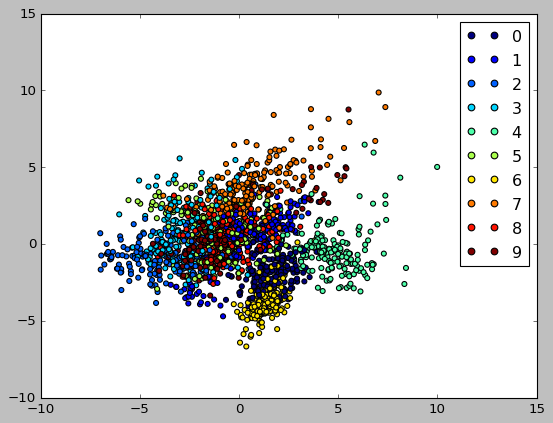

In [45]:
# projecting A
U, S, V = extm.randomized_svd(A_norm, 2, random_state = 0)
A_pr = U * S

p = plt.scatter(x = A_pr[:, 0], y = A_pr[:, 1], c = y)
plt.gca()
plt.legend(*p.legend_elements())